In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from scipy.stats.mstats import winsorize
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv("/content/heart.csv")

In [ ]:

# IT24102626 Class balanced check (Apply SMORT)
# Features and target
X = df.drop("target", axis=1)
y = df["target"]

# Split before applying SMOTE (to avoid data leakage)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Apply SMOTE only on training data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts().to_dict())
print("After SMOTE:", y_train_res.value_counts().to_dict())

Before SMOTE: {1: 421, 0: 399}
After SMOTE: {0: 421, 1: 421}


In [ ]:

#IT24102694 Scaling
from sklearn.preprocessing import StandardScaler

In [ ]:

numeric_cols = ["age", "trestbps", "chol", "thalach", "oldpeak"]

# Scale numeric features AFTER SMOTE
scaler = StandardScaler()
X_train_res[numeric_cols] = scaler.fit_transform(X_train_res[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])  # use same scaler

# Show scaled training data (first 5 rows of numeric columns)
pd.DataFrame(X_train_res, columns=X_train.columns)[numeric_cols].head()

,age,trestbps,chol,thalach,oldpeak
0,0.805822,0.302120,0.893807,-1.914677,0.679086
1,0.143222,3.744259,0.776785,-0.715782,2.455167
2,0.253656,-0.253064,-0.373927,0.039077,-0.589543
3,0.253656,0.968340,-2.382798,1.060358,-0.758693
4,-0.298511,0.191083,-1.017546,0.882744,-0.843268


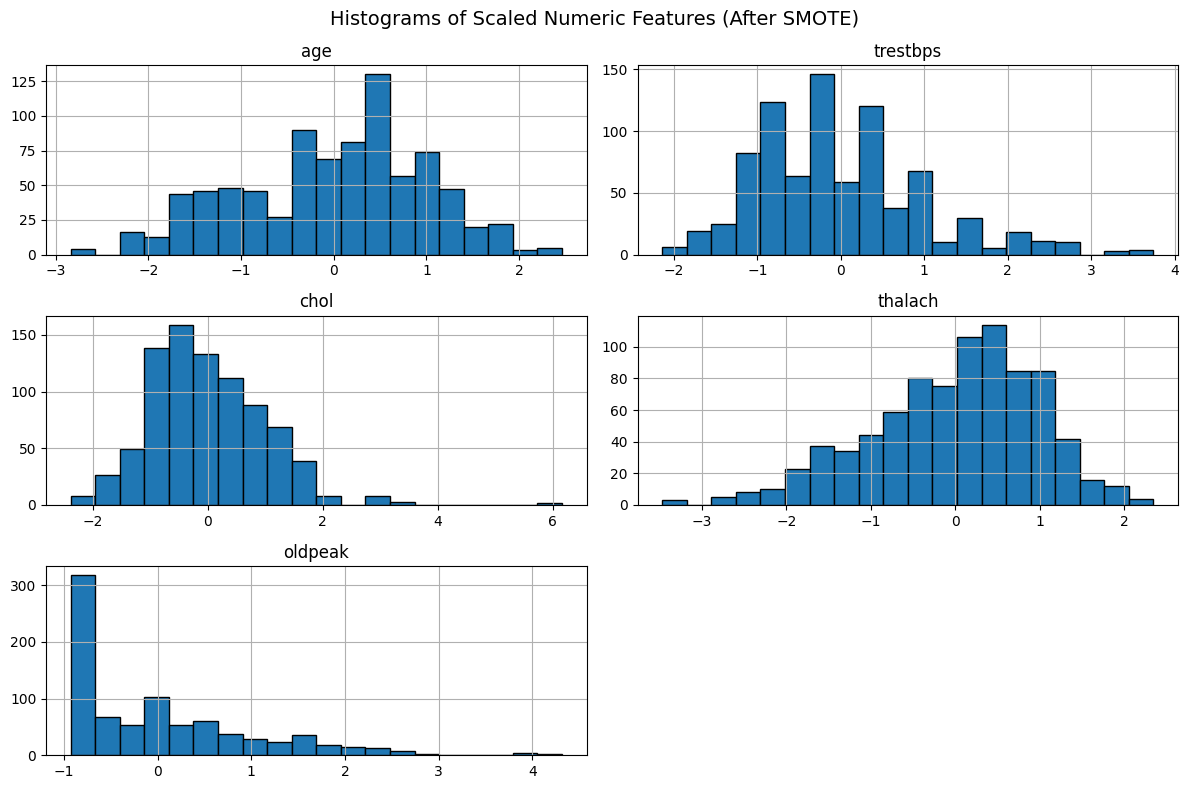

In [ ]:

X_train_res_scaled = pd.DataFrame(X_train_res, columns=X_train.columns)

X_train_res_scaled[numeric_cols].hist(figsize=(12, 8), bins=20, edgecolor='black')
plt.suptitle("Histograms of Scaled Numeric Features (After SMOTE)", fontsize=14)
plt.tight_layout()
plt.show()


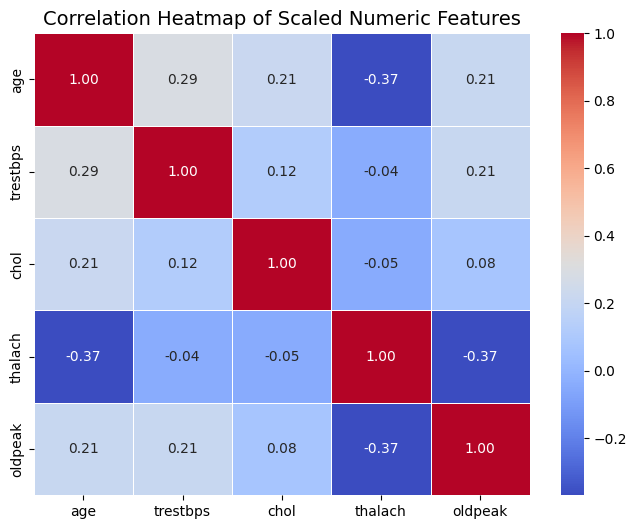

In [ ]:

# Heatmap of correlations
plt.figure(figsize=(8, 6))
corr_matrix = X_train_res_scaled[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Scaled Numeric Features", fontsize=14)
plt.show()